# **CVPS20 // Neural Networks with Tensorflow and Keras: Part 2**

*November 5, 2020*

This notebook will explore the Tensorflow/Keras framework for constructing and training CNNs.

---

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
# plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

#### **Load the Data and Create Training/Testing Sets**

In [7]:
# -- load data in RGB
ellip = np.load("/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_elliptical.npy") / 255.
spiral = np.load("/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_spiral.npy") / 255.

In [8]:
spiral.shape

(5000, 106, 106, 3)

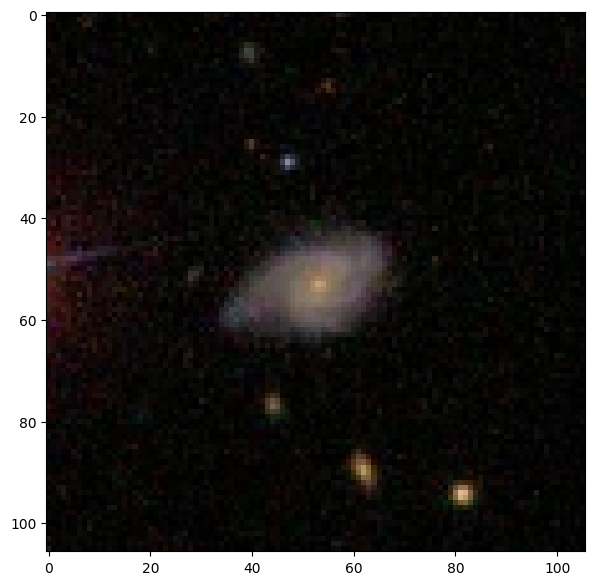

In [9]:
plt.imshow(spiral[0])

In [10]:
# -- concatenate
gals = np.concatenate((ellip, spiral), axis=0)

In [11]:
gals.shape

(10000, 106, 106, 3)

In [12]:
# -- extract shape parameters
ngal = gals.shape[0]
nrow = gals.shape[1]
ncol = gals.shape[2]

In [13]:
 # -- create features arrays
feat = gals.mean(axis=3)

In [14]:
feat.shape

(10000, 106, 106)

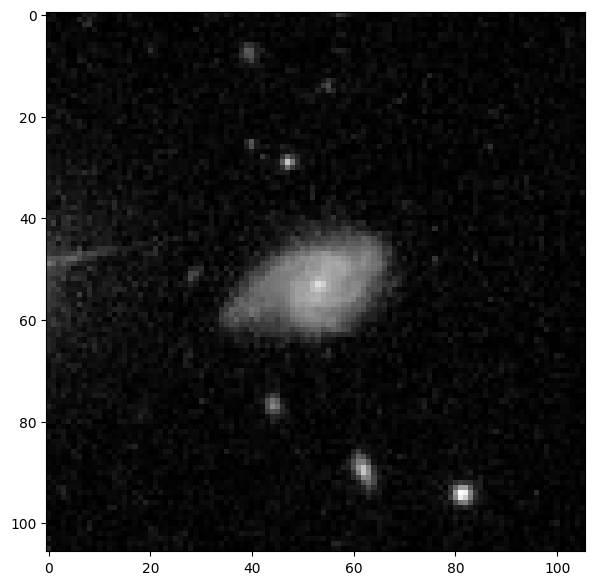

In [15]:
plt.imshow(feat[5000])

In [16]:
# -- create the target
targ = np.concatenate((np.full(5000, 0), np.full(5000, 1)))

In [17]:
targ.shape

(10000,)

In [18]:
# -- generate a training/testing set
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, train_size=4000, test_size=1000, random_state=302)

In [19]:
feat_te.shape

(1000, 106, 106)

In [20]:

# -- define confusion matrix plot
def conf_matrix_plot(cmat):
  """ Visulize a confusion matrix. """

  # -- initialize the plot
  fig, ax = plt.subplots()

  # -- show the confusion matrix
  im = ax.imshow(cmat, cmap="viridis")

  # -- set the tick labels
  ax.set_xticks(range(2))
  ax.set_yticks(range(2))
  ax.set_xticklabels(["ellip", "spiral"])
  ax.set_yticklabels(["ellip", "spiral"])

  # -- label the axes
  ax.set_ylabel("true label")
  ax.set_xlabel("predicted label")

  # -- print the number in each cell
  for ii in range(2):
    for jj in range(2):
      ax.text(jj, ii, cmat[ii, jj], color="orangered", ha="center", va="center")

  # -- show the figure
  fig.show()

  return

---

#### **Classify Galaxy Type Using a Convolutional Neural Network**

Before we build the model, let's create features that have the full 2D shape,

In [21]:
# -- reshape the features
feat_tr = feat_tr.reshape(feat_tr.shape[0], nrow, ncol, 1)
feat_te = feat_te.reshape(feat_te.shape[0], nrow, ncol, 1)

In [22]:
feat_tr.shape

(4000, 106, 106, 1)

In [23]:
# -- define the layers
layer1 = keras.layers.Conv2D(3, (5, 5), activation="sigmoid", input_shape=(106, 106, 1))
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Flatten()
layer4 = keras.layers.Dense(100, activation="sigmoid")
layer5 = keras.layers.Dense(2, activation="softmax")

layers = [layer1, layer2, layer3, layer4, layer5]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [26]:
# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=20, batch_size=100, verbose=1)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 649ms/step - accuracy: 0.4985 - loss: 2.4954
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 468ms/step - accuracy: 0.5023 - loss: 1.1533
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 445ms/step - accuracy: 0.5108 - loss: 0.6939
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 476ms/step - accuracy: 0.5027 - loss: 0.6932
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 522ms/step - accuracy: 0.5009 - loss: 0.6932
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 438ms/step - accuracy: 0.5100 - loss: 0.6933
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 447ms/step - accuracy: 0.5145 - loss: 0.6929
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 467ms/step - accuracy: 0.4701 - loss: 0.6936
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 446ms/step - accuracy: 0.5176 - loss: 0.6928
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - accuracy: 0.4946 - loss: 0.6934
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 444ms/step - accuracy: 0.4916 - loss: 0.6939
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20

In [ ]:
# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Training accuracy : 0.4902
Testing accuracy  : 0.4990


*How do we interpret this accuracy?*

Let's make a slight adjustment to our model: the **activation function**,

In [23]:
# -- define the layers
layer1 = keras.layers.Conv2D(3, (5, 5), activation="relu", input_shape=(106, 106, 1))
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Flatten()
layer4 = keras.layers.Dense(100, activation="relu")
layer5 = keras.layers.Dense(2, activation="softmax")

layers = [layer1, layer2, layer3, layer4, layer5]

# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=20, batch_size=100, verbose=1)

# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 462ms/step - accuracy: 0.6097 - loss: 0.6596
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 483ms/step - accuracy: 0.7972 - loss: 0.4835
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 449ms/step - accuracy: 0.8739 - loss: 0.3697
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 461ms/step - accuracy: 0.9093 - loss: 0.3004
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 452ms/step - accuracy: 0.9181 - loss: 0.2437
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 455ms/step - accuracy: 0.9171 - loss: 0.2343
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 511ms/step - accuracy: 0.9461 - loss: 0.1741
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 449ms/step - accuracy: 0.9627 - loss: 0.1436
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 483ms/step - accuracy: 0.9667 - loss: 0.1247
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 449ms/step - accuracy: 0.9666 - loss: 0.1168
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 448ms/step - accuracy: 0.9759 - loss: 0.0934
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22

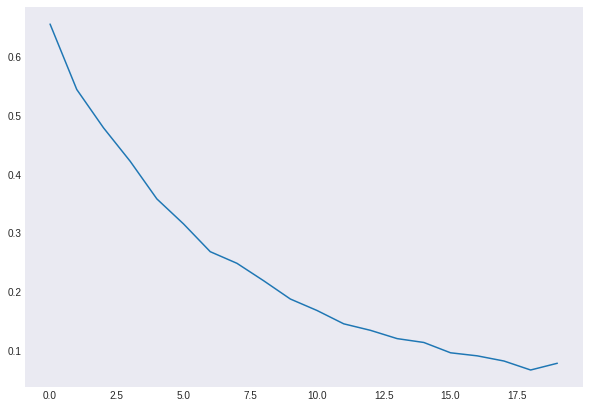

In [ ]:
plt.plot(history.history["loss"])

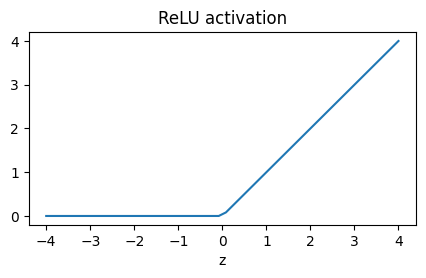

In [26]:
# -- FYI, the relu activiation function
z = np.linspace(-4, 4)
plt.figure(figsize=[5, 2.5])
plt.plot(z, z * (z > 0))
plt.title("ReLU activation")
plt.xlabel("z")
plt.show()

Let's create a bit more flexible and slightly *deeper* CNN,

In [ ]:
# -- define the layers
layer1 = keras.layers.Conv2D(32, (5, 5), activation="relu", input_shape=(106, 106, 1))
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="relu")
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(1024, activation="relu")
layer7 = keras.layers.Dense(2, activation="softmax")

layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]

# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=50, batch_size=100, verbose=1)

# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.5185 - loss: 0.8896
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.5064 - loss: 0.6931
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.5048 - loss: 0.6931
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 205s 4s/step - accuracy: 0.5009 - loss: 0.6932
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.5614 - loss: 0.6827
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.7812 - loss: 0.4818
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.8468 - loss: 0.3748
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.8810 - loss: 0.3125
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.8979 - loss: 0.2536
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.9172 - loss: 0.2228
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.9266 - loss: 0.1981
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy:

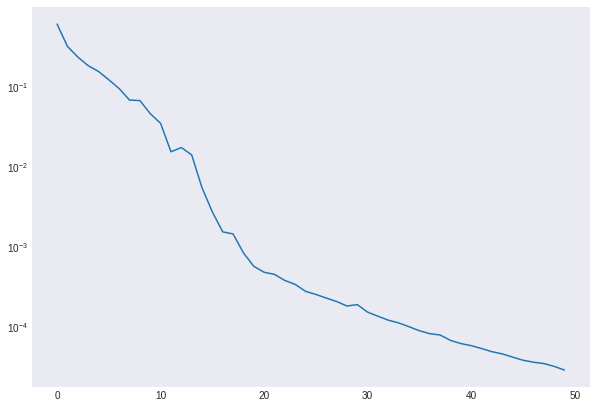

In [ ]:
plt.plot(history.history["loss"])
plt.yscale("log")

Note, we're using *luminosity* for training,

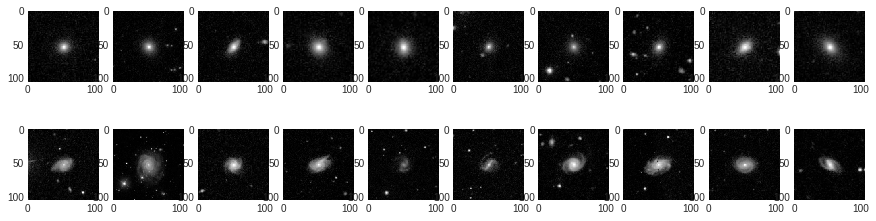

In [ ]:
# -- plot the first 10 elliptical and spirals
fig, ax = plt.subplots(2, 10, figsize=[15, 4])
for ii in range(10):
  ax[0, ii].imshow(feat[ii])
for ii in range(10):
  ax[1, ii].imshow(feat[5000 + ii])
fig.show()

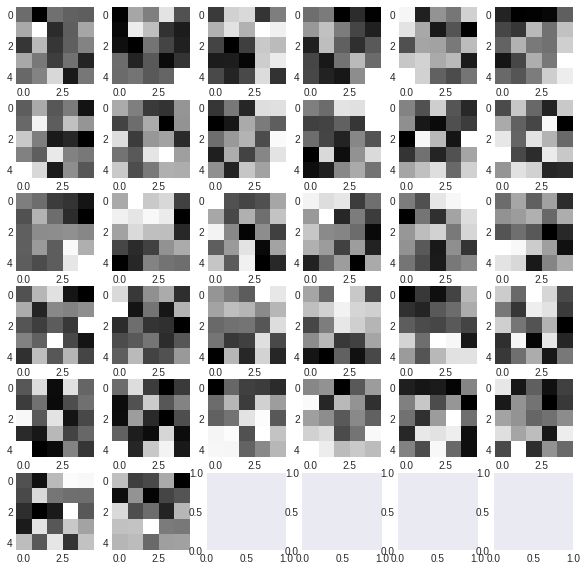

In [ ]:
# -- plot the first layer filters
ww = model.get_weights()[0]
fig, ax = plt.subplots(6, 6, figsize=[10, 10])
for ii in range(32):
  ax[ii // 6, ii % 6].imshow(ww[:, :, 0, ii])
fig.show()

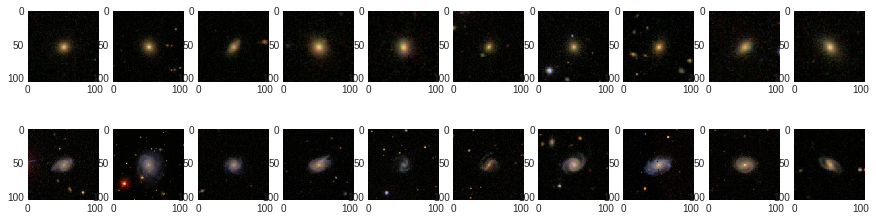

In [ ]:
# -- plot the first 10 elliptical and spirals
fig, ax = plt.subplots(2, 10, figsize=[15, 4])
for ii in range(10):
  ax[0, ii].imshow(gals[ii])
for ii in range(10):
  ax[1, ii].imshow(gals[5000 + ii])
fig.show()

But...

In [ ]:
model.predict(spiral[0:3])

ValueError: ignored

In [ ]:
spiral[0:3].shape

(3, 106, 106, 3)